In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('../data/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

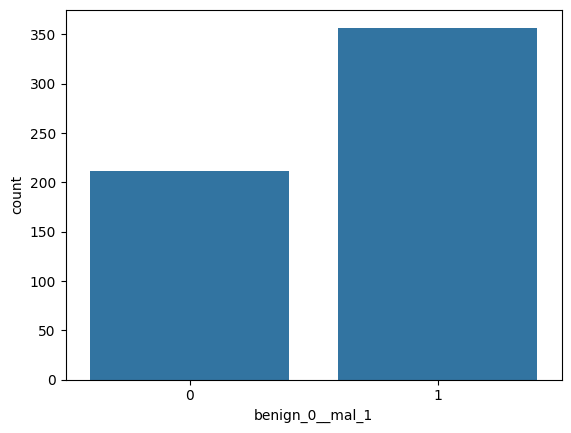

In [6]:
sns.countplot(x='benign_0__mal_1', data = df)

<Axes: >

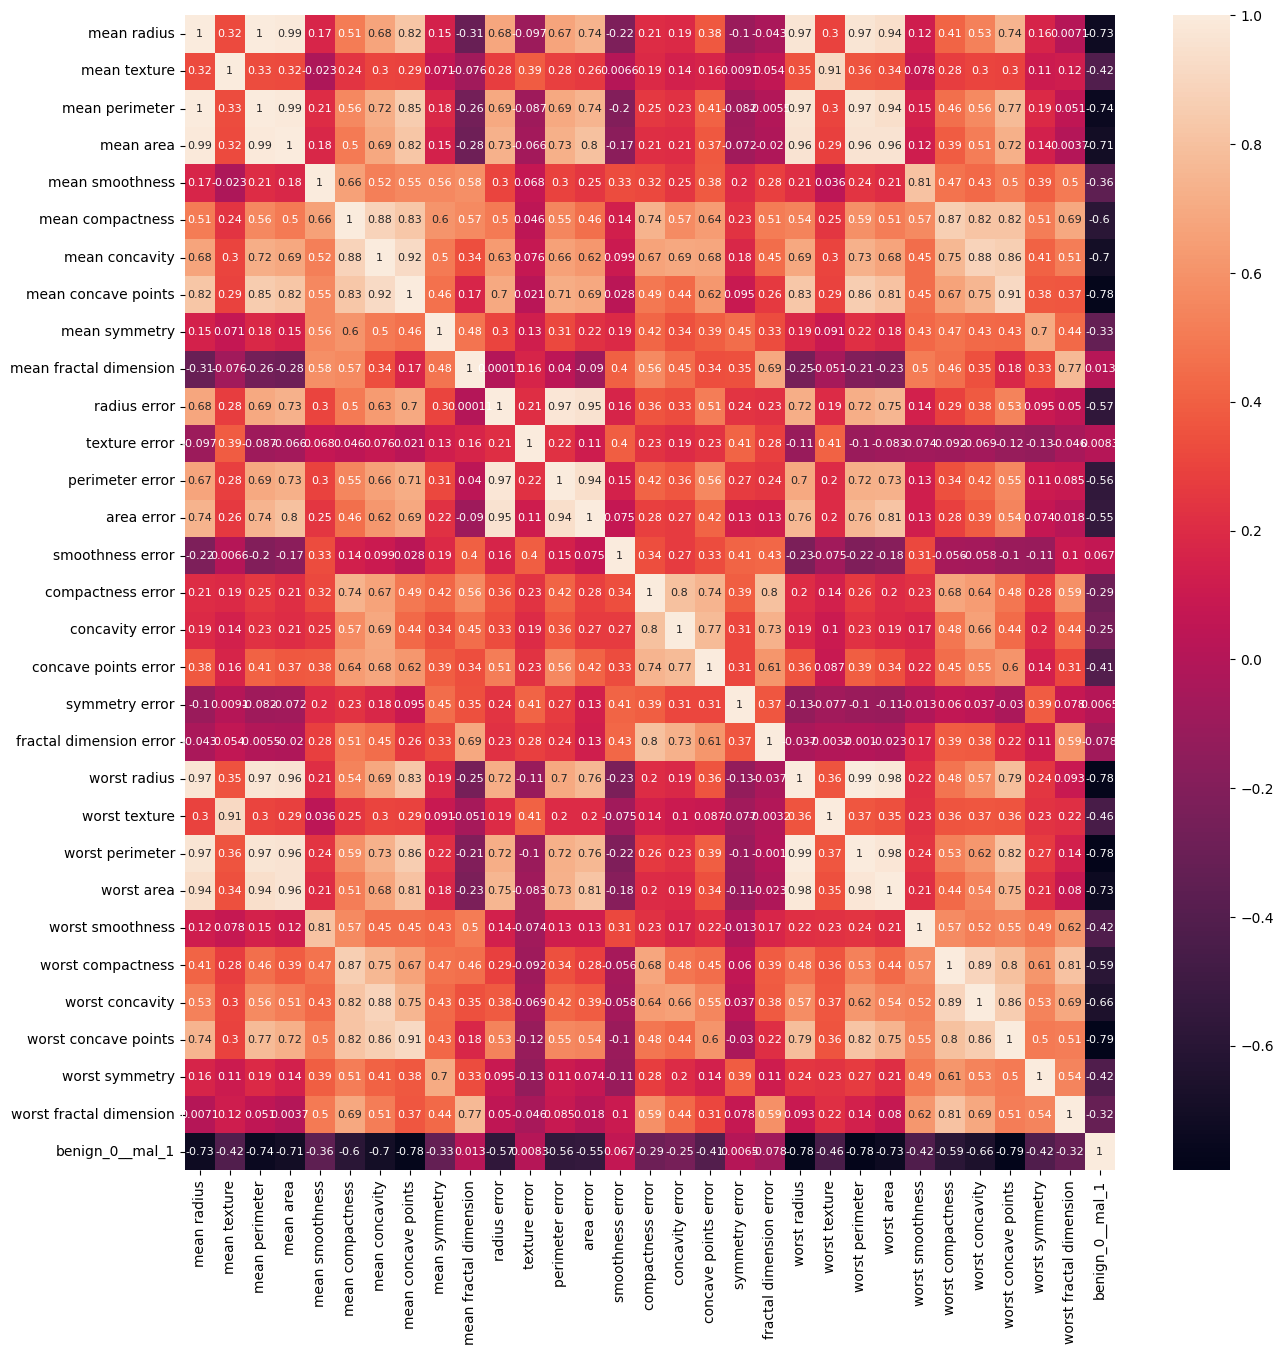

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, annot_kws={'size':8})

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

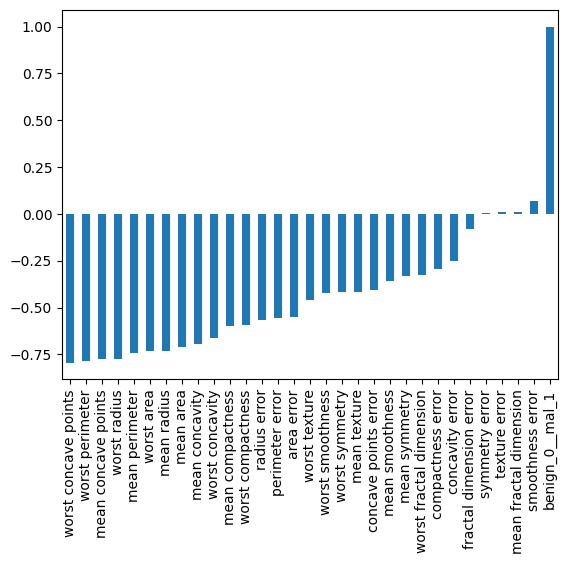

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [10]:
X = df.drop('benign_0__mal_1', axis = 1).values
Y = df['benign_0__mal_1'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=23)

print(X_train.shape, Y_train.shape)

(426, 30) (426,)


In [11]:
print(X_test.shape, Y_test.shape)

(143, 30) (143,)


In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
model.fit(x = X_train, y = Y_train, epochs = 600, validation_data = (X_test, Y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6327 - loss: 0.6768 - val_accuracy: 0.6923 - val_loss: 0.6511
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6891 - loss: 0.6471 - val_accuracy: 0.8531 - val_loss: 0.6134
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8689 - loss: 0.6050 - val_accuracy: 0.8881 - val_loss: 0.5686
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8690 - loss: 0.5632 - val_accuracy: 0.9231 - val_loss: 0.5120
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9136 - loss: 0.5081 - val_accuracy: 0.9161 - val_loss: 0.4594
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9040 - loss: 0.4580 - val_accuracy: 0.9161 - val_loss: 0.4069
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8998 - loss: 0.4132 - val_accuracy: 0.9301 - val_loss: 0.3544
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9159 - loss: 0.3637 - val_accuracy: 0.9371 - 

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235 (16.55 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824 (11.04 KB)

In [16]:
info_before_stop = pd.DataFrame(model.history.history)
info_before_stop

,accuracy,loss,val_accuracy,val_loss
0,0.615023,0.677907,0.692308,0.651137
1,0.732394,0.638464,0.853147,0.613381
2,0.873239,0.598092,0.888112,0.568575
3,0.877934,0.550853,0.923077,0.511957
4,0.908451,0.501140,0.916084,0.459415
...,...,...,...,...
595,1.000000,0.004221,0.972028,0.285102
596,1.000000,0.003988,0.972028,0.277885
597,1.000000,0.004255,0.972028,0.287359
598,1.000000,0.004506,0.972028,0.279758


<Axes: >

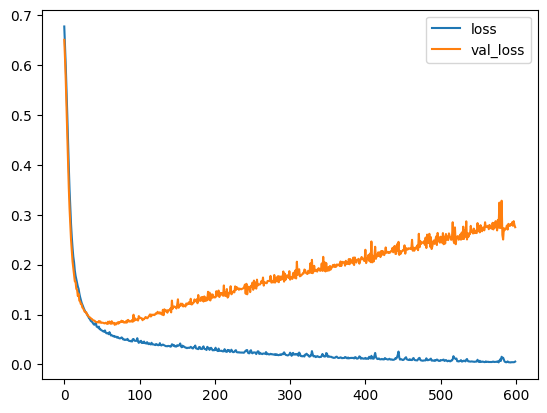

In [17]:
info_before_stop[['loss', 'val_loss']].plot()

# Early Stopping

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping =  EarlyStopping(monitor = 'val_loss', mode = 'min', patience =20, restore_best_weights=True,  verbose=1)

In [19]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.fit(x = X_train, y= Y_train, epochs = 600, validation_data=(X_test, Y_test), callbacks=[earlyStopping])

Epoch 1/600


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5815 - loss: 0.6962 - val_accuracy: 0.8182 - val_loss: 0.6501
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 0.6514 - val_accuracy: 0.8671 - val_loss: 0.6134
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8704 - loss: 0.6151 - val_accuracy: 0.9091 - val_loss: 0.5735
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9001 - loss: 0.5711 - val_accuracy: 0.9091 - val_loss: 0.5286
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9076 - loss: 0.5294 - val_accuracy: 0.9231 - val_loss: 0.4731
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9157 - loss: 0.4736 - val_accuracy: 0.9091 - val_loss: 0.4037
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8938 - loss: 0.4159 - val_accuracy: 0.9441 - val_loss: 0.3529
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8999 - loss: 0.3747 - val_accuracy: 0.9231 - val_loss: 0.

<Axes: >

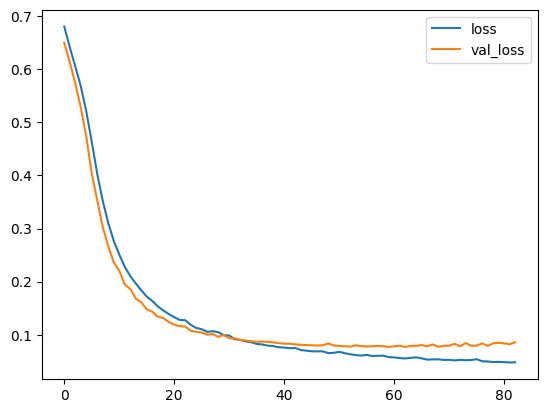

In [21]:
info_after_stop = pd.DataFrame(model.history.history)
info_after_stop[['loss', 'val_loss']].plot()

In [22]:
Y_test_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [23]:
Y_test_pred

array([[9.9346685e-01],
       [5.4349178e-01],
       [5.8173896e-06],
       [9.7172332e-01],
       [2.6095717e-03],
       [2.3627636e-04],
       [3.2905643e-04],
       [7.8928018e-01],
       [9.9329919e-01],
       [4.7735092e-03],
       [1.4642416e-09],
       [9.9998665e-01],
       [9.9648362e-01],
       [9.9992061e-01],
       [9.9998498e-01],
       [9.9952066e-01],
       [9.9920911e-01],
       [7.8009403e-01],
       [1.3713293e-04],
       [9.5450425e-01],
       [9.9151540e-01],
       [9.0619695e-01],
       [8.9127576e-04],
       [9.9895787e-01],
       [1.0746059e-01],
       [8.7327147e-01],
       [9.9145210e-01],
       [9.9578017e-01],
       [9.2558736e-01],
       [7.9038054e-01],
       [8.6386359e-01],
       [3.3230183e-03],
       [6.9664875e-06],
       [9.9961531e-01],
       [9.8603743e-01],
       [9.9821830e-01],
       [9.9987870e-01],
       [9.9795449e-01],
       [7.0425999e-01],
       [9.9975747e-01],
       [9.9744034e-01],
       [9.998530

In [24]:
Y_test_pred = (Y_test_pred > 0.5).astype('int32')
Y_test_pred

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.98      1.00      0.99        95

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [26]:
print(confusion_matrix(Y_test, Y_test_pred))

[[46  2]
 [ 0 95]]


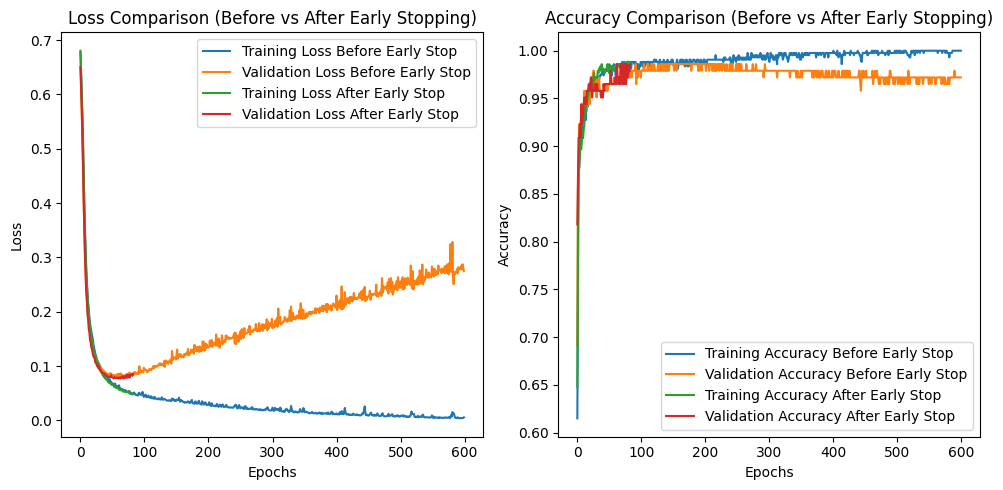

In [27]:
import matplotlib.pyplot as plt

# Plot for training and validation loss/accuracy
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(info_before_stop['loss'], label='Training Loss Before Early Stop')
plt.plot(info_before_stop['val_loss'], label='Validation Loss Before Early Stop')
plt.plot(info_after_stop['loss'], label='Training Loss After Early Stop')
plt.plot(info_after_stop['val_loss'], label='Validation Loss After Early Stop')
plt.title('Loss Comparison (Before vs After Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(info_before_stop['accuracy'], label='Training Accuracy Before Early Stop')
plt.plot(info_before_stop['val_accuracy'], label='Validation Accuracy Before Early Stop')
plt.plot(info_after_stop['accuracy'], label='Training Accuracy After Early Stop')
plt.plot(info_after_stop['val_accuracy'], label='Validation Accuracy After Early Stop')
plt.title('Accuracy Comparison (Before vs After Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
